In [1]:
import cv2 
import numpy as np 
import mediapipe as mp 
import matplotlib.pyplot as plt 

In [9]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [3]:
path = "/home/anindya/Documents/Github/YogaPosGNN/videos/video2.mkv"

In [4]:
cap = cv2.VideoCapture(path)

counter = 0

while True:
    counter += 1
    ret, frame = cap.read() 
    if counter > 500 : break 

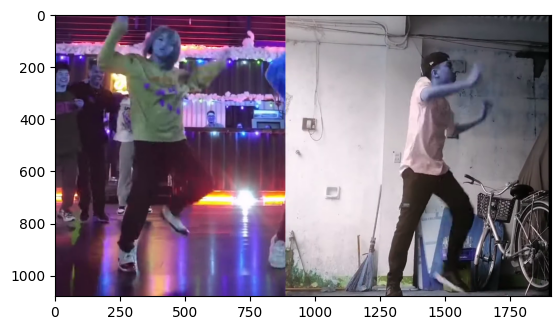

In [5]:
plt.imshow(frame)

In [12]:
def predict_on_image(image):
    BG_COLOR = (192, 192, 192) # gray
    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.28) as pose:
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            return None, None
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )

        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Plot pose world landmarks.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    return annotated_image, results

Nose coordinates: (1517.1841869354248, 226.84268832206726)


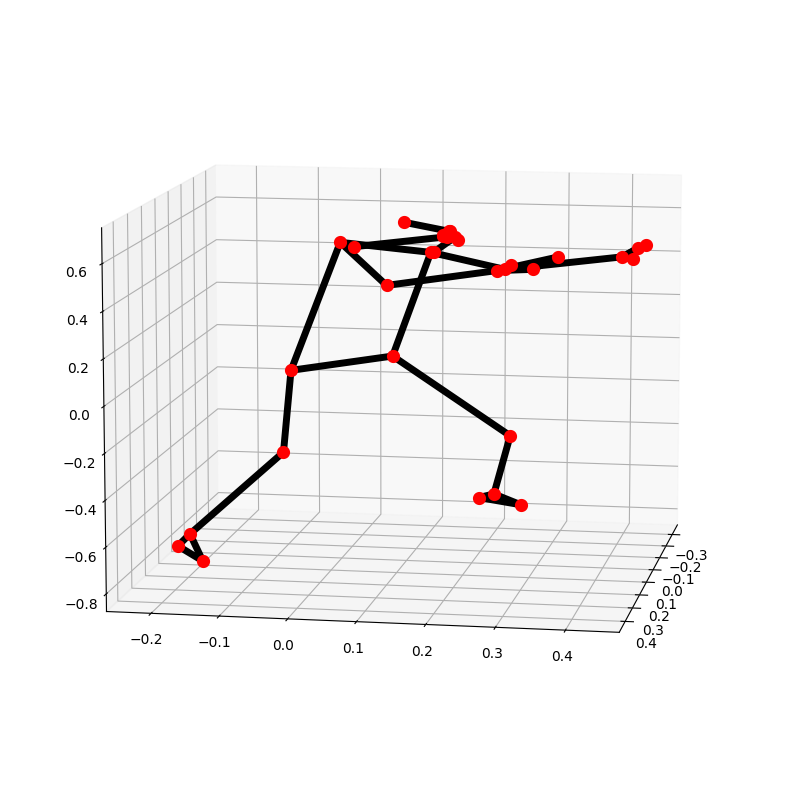

In [13]:
image, results = predict_on_image(frame)

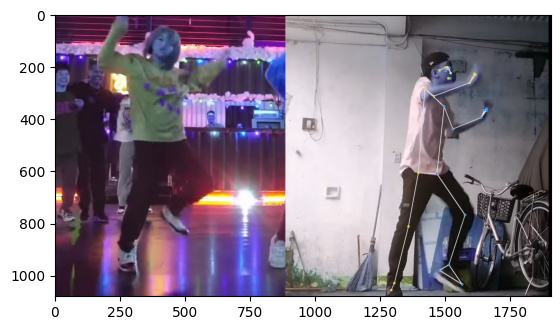

In [47]:
plt.imshow(image)

In [39]:
import cv2
import math


def draw_custom_landmark(
    image,
    landmarks,
    connection,
    indices_to_avoid_nodes=None,
    indices_to_avoid_edges=None,
    dot_color=(0, 255, 0),
    line_color=(0, 0, 255),
    diameter=6,
    line_width=3,
):
    """
    image : numpy.ndarray,
    landmarks : mediapipe_landmarks.landmark,
    indices_to_avoid_nodes : the indices to avoid during drawing for the nodes,
    indices_to_avoid_edges : the indices to avoid during drawing for the edges,
    dot_color : the color of the nodes,
    line_color : the color of the edges,
    diameter : the diameter of the circle of the nodes,
    line_width : the width of the circle
    """
    # TODO : draw a trivial edge as a hand to palm joint
    # TODO : Have to make compatible with multi landmarks, though it could be done explicitely

    height, width, _ = image.shape
    connection = list(connection)
    keypoints = []

    for idx, landmark in enumerate(landmarks):
        x, y = landmark

        x_px = int(min(math.floor(x * width), width - 1))
        y_px = int(min(math.floor(y * height), height - 1))
        keypoints.append((x_px, y_px))

        if indices_to_avoid_nodes is not None and idx in indices_to_avoid_nodes:
            continue

        else:
            cv2.circle(image, (int(x_px), int(y_px)), diameter, dot_color, -1)

    for inx, conn in enumerate(connection):
        from_ = conn[0]
        to_ = conn[1]
        if indices_to_avoid_edges is not None and from_ in indices_to_avoid_edges:
            continue
        else:
            if keypoints[from_] and keypoints[to_]:
                cv2.line(image, keypoints[from_], keypoints[to_], line_color, line_width)
            else:
                continue
    return image

In [23]:
for l in results.pose_landmarks.landmark:
    print(l.x, l.y)
    break

0.7960042953491211 0.21003952622413635


In [42]:
img = draw_custom_landmark(
    frame, landmarks=landmarks, 
    connection=mp_pose.POSE_CONNECTIONS
)

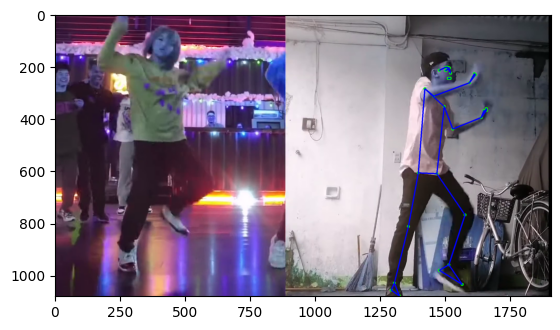

In [43]:
plt.imshow(img)

In [41]:
landmarks = []

for landmark in results.pose_landmarks.landmark:
    landmarks.append((landmark.x, landmark.y))

In [45]:
pose_lists = [landmarks]

In [33]:
import pickle

In [55]:
import json

with open("test", "w") as fp:
    json.dump(results.pose_landmarks.landmark, fp)

TypeError: Object of type RepeatedCompositeContainer is not JSON serializable

In [51]:
type(results.pose_landmarks.landmark)

google.protobuf.pyext._message.RepeatedCompositeContainer

In [53]:
with open('test') as f:
    data = json.load(f)

In [54]:
data

[[[0.7960042953491211, 0.21003952622413635],
  [0.7925000786781311, 0.19017240405082703],
  [0.7930682897567749, 0.1909024715423584],
  [0.7938021421432495, 0.19159471988677979],
  [0.7895686626434326, 0.1887601912021637],
  [0.7876728177070618, 0.18904396891593933],
  [0.7857766151428223, 0.18950510025024414],
  [0.7862943410873413, 0.2000718116760254],
  [0.7737029790878296, 0.1992107331752777],
  [0.7950590252876282, 0.22854310274124146],
  [0.7914794683456421, 0.22809147834777832],
  [0.7828629016876221, 0.3279597759246826],
  [0.7444294095039368, 0.2650795578956604],
  [0.8004419207572937, 0.40808048844337463],
  [0.7621774673461914, 0.2911011278629303],
  [0.8576341867446899, 0.3666902780532837],
  [0.8341882228851318, 0.24365638196468353],
  [0.8680314421653748, 0.3420502245426178],
  [0.8458706736564636, 0.2150571644306183],
  [0.8678606152534485, 0.33606940507888794],
  [0.8439844846725464, 0.21156054735183716],
  [0.8633275032043457, 0.3422713875770569],
  [0.8406662940979004

In [57]:
for conn in mp_pose.POSE_CONNECTIONS:
    print(conn)

(15, 21)
(16, 20)
(18, 20)
(3, 7)
(14, 16)
(23, 25)
(28, 30)
(11, 23)
(27, 31)
(6, 8)
(15, 17)
(24, 26)
(16, 22)
(4, 5)
(5, 6)
(29, 31)
(12, 24)
(23, 24)
(0, 1)
(9, 10)
(1, 2)
(0, 4)
(11, 13)
(30, 32)
(28, 32)
(15, 19)
(16, 18)
(25, 27)
(26, 28)
(12, 14)
(17, 19)
(2, 3)
(11, 12)
(27, 29)
(13, 15)
